In [106]:
import csv
import numpy as np
from matplotlib import pylab as plt
numberOfFeatures = 4
numberOfSpecies = 3
colors = [np.random.rand(3) for x in range(numberOfSpecies)]

In [107]:
f = open('iris.csv')
A = []
b = []
numberOfSamples = 0
for row in csv.reader(f):
    if not len(row): break
    numberOfSamples += 1
    A.extend(row[0:-1])
    b.extend(row[-1:])
samplesPerSpecies = numberOfSamples / numberOfSpecies

In [109]:
# for sampleIndex in range(numberOfSamples):
#     startingIndex = sampleIndex * numberOfFeatures
#     features = A[startingIndex:startingIndex + 4]
#     species = b[sampleIndex]
#     print features, species

def featureFromA(featureIndex):
    return [A[x] for x in range(len(A)) if (x - featureIndex) % 4 == 0]

a = featureFromA(0)
b = featureFromA(1)
c = featureFromA(2)
d = featureFromA(3)

print a
print b

['5.1', '4.9', '4.7', '4.6', '5.0', '5.4', '4.6', '5.0', '4.4', '4.9', '5.4', '4.8', '4.8', '4.3', '5.8', '5.7', '5.4', '5.1', '5.7', '5.1', '5.4', '5.1', '4.6', '5.1', '4.8', '5.0', '5.0', '5.2', '5.2', '4.7', '4.8', '5.4', '5.2', '5.5', '4.9', '5.0', '5.5', '4.9', '4.4', '5.1', '5.0', '4.5', '4.4', '5.0', '5.1', '4.8', '5.1', '4.6', '5.3', '5.0', '7.0', '6.4', '6.9', '5.5', '6.5', '5.7', '6.3', '4.9', '6.6', '5.2', '5.0', '5.9', '6.0', '6.1', '5.6', '6.7', '5.6', '5.8', '6.2', '5.6', '5.9', '6.1', '6.3', '6.1', '6.4', '6.6', '6.8', '6.7', '6.0', '5.7', '5.5', '5.5', '5.8', '6.0', '5.4', '6.0', '6.7', '6.3', '5.6', '5.5', '5.5', '6.1', '5.8', '5.0', '5.6', '5.7', '5.7', '6.2', '5.1', '5.7', '6.3', '5.8', '7.1', '6.3', '6.5', '7.6', '4.9', '7.3', '6.7', '7.2', '6.5', '6.4', '6.8', '5.7', '5.8', '6.4', '6.5', '7.7', '7.7', '6.0', '6.9', '5.6', '7.7', '6.3', '6.7', '7.2', '6.2', '6.1', '6.4', '7.2', '7.4', '7.9', '6.4', '6.3', '6.1', '7.7', '6.3', '6.4', '6.0', '6.9', '6.7', '6.9', '5.8'

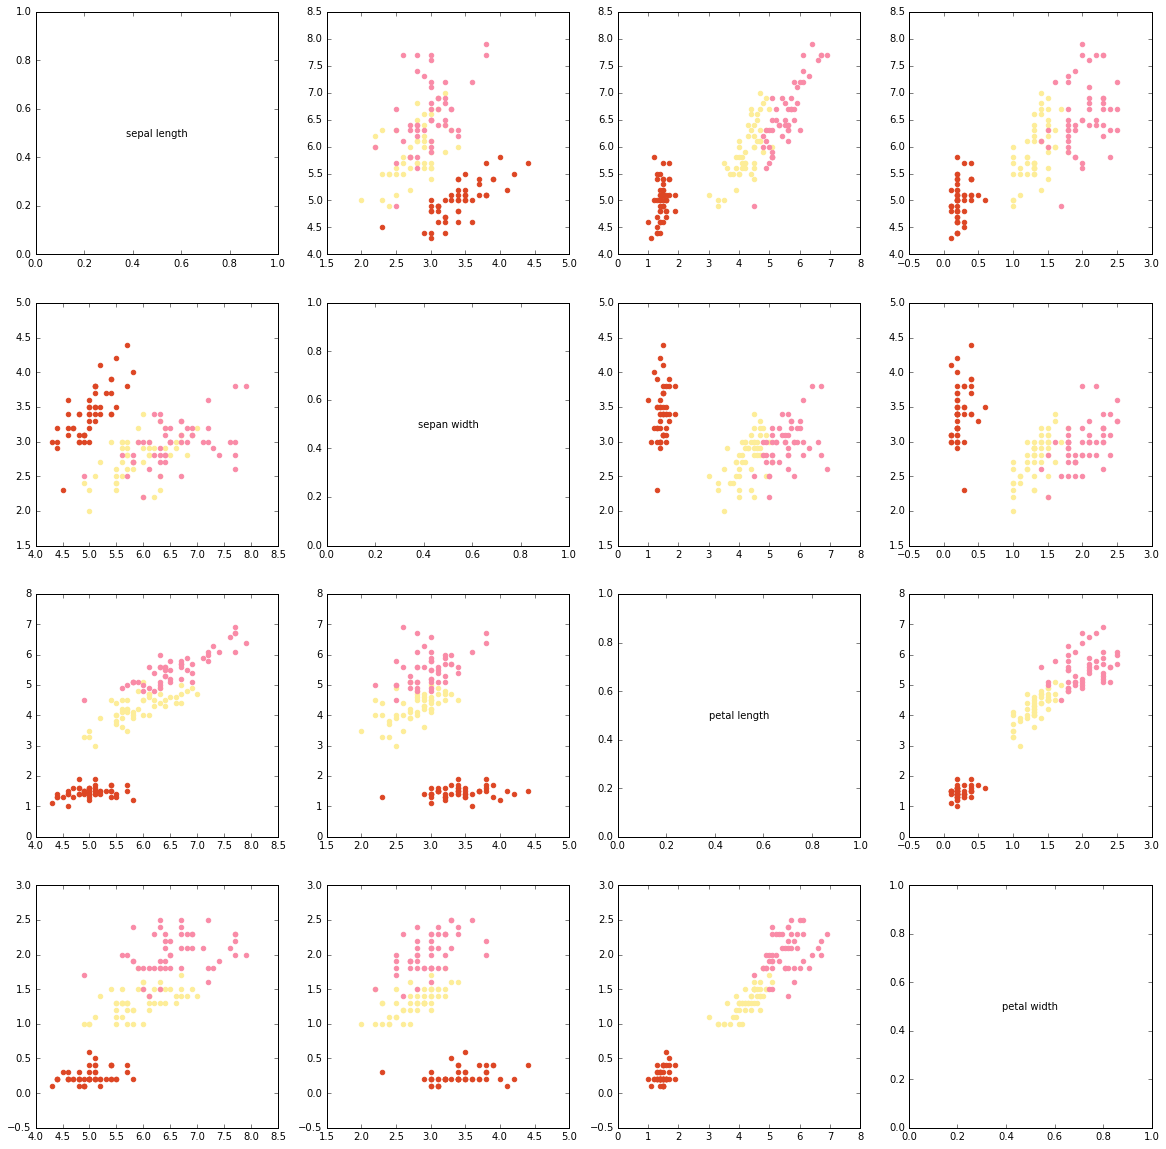

In [110]:
%matplotlib inline

# layout `figure` which contains all the subplots
plt.figure(num=1, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
plt.figure(1)
# draw one subplot for each feature pair and a text subplot for each feature overlap
numberOfSubplots = numberOfFeatures * numberOfFeatures

def createSubplotForRowAndColumn(row, column):
    plt.subplot(numberOfFeatures, numberOfFeatures, subplot) #subplot(rows, columns, subplot)
    if row == column:
        text = None
        if row == 0:
            text = 'sepal length'
        elif row == 1:
            text = 'sepan width'
        elif row == 2:
            text = 'petal length'
        else:
            text = 'petal width'
        plt.text(0.5, 0.5, text, ha="center", va="center")
        return
    
    xs = None
    ys = None
    if column == 0:
        xs = a
    elif column == 1:
        xs = b
    elif column == 2: 
        xs = c
    else:
        xs = d
        
    if row == 0:
        ys = a
    elif row == 1:
        ys = b
    elif row == 2: 
        ys = c
    else:
        ys = d
    
    for species in range(numberOfSpecies):
        startingIndex = species * samplesPerSpecies
        subXs = np.array(xs[startingIndex:startingIndex + samplesPerSpecies])
        subYs = np.array(ys[startingIndex:startingIndex + samplesPerSpecies])
        color = colors[species % len(colors)]
        plt.scatter(subXs, subYs, color=color)

for subplot in range(1, numberOfSubplots + 1):
    column = (subplot - 1) % numberOfFeatures
    row = (subplot - 1) / numberOfFeatures
    createSubplotForRowAndColumn(row, column)
    